In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:\Data+Science@Consoleflare\Pandas\Python Customer segmentation and Clustering\Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.rename(columns={'Genre': 'Gender'}, inplace=True)


# Univariate Analysis

Univariate analysis is a statistical method used to examine and describe data involving a single variable. It focuses on understanding the characteristics, patterns, and distributions of a single variable in isolation, without considering the relationships with other variables. It provides valuable insights into the individual variables' behavior, including measures of central tendency, dispersion, and shape.

Customer segmentation and clustering involve dividing a customer base into distinct groups based on specific characteristics or behaviors. Univariate analysis can be utilized as a preliminary step to understand and identify relevant variables for customer segmentation and clustering. Let's consider an example to illustrate this process:

Suppose a retail company wants to segment its customer base to improve marketing strategies. They have collected data on various customer attributes, such as age, income, and spending habits. To begin the analysis, the company may conduct univariate analysis on each variable individually.

Age: The company examines the age distribution of its customers. They calculate measures such as the mean, median, and mode to understand the central tendency of age. Additionally, they analyze the range, standard deviation, and variance to assess the dispersion or variability of customer ages. This analysis helps identify the age groups that are most prevalent among customers.

Income: Univariate analysis is performed on income data to understand the income distribution among customers.

Spending habits: The company analyzes variables related to customer spending, such as average transaction amount or purchase frequency. They calculate measures like mean, median, and quartiles to understand the central tendency of spending habits.

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

The distplot(), kdeplot(), and catplot() functions are all part of the seaborn library and serve different purposes for data visualization.

distplot()function was used in previous versions of seaborn to plot the distribution of a univariate dataset.
It combined a histogram with a kernel density estimate (KDE) plot.

The kdeplot() function is used to plot the kernel density estimate (KDE) of a univariate or bivariate dataset.
It displays the shape of the distribution by estimating the underlying probability density function (PDF).
It can be used to visualize the smoothness and pattern of data without explicitly binning it into a histogram.
kdeplot() can also show rug plots, shading, and cumulative distribution functions (CDFs) as additional visual elements.
catplot():

The catplot() function is used for categorical data visualization, particularly for plotting categorical variables against one or more numerical variables.
It can be used to create various types of categorical plots such as box plots, violin plots, swarm plots, etc.
catplot() provides a high-level interface for creating grouped or faceted plots based on the kind parameter, which allows you to specify the type of categorical plot you want to create.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

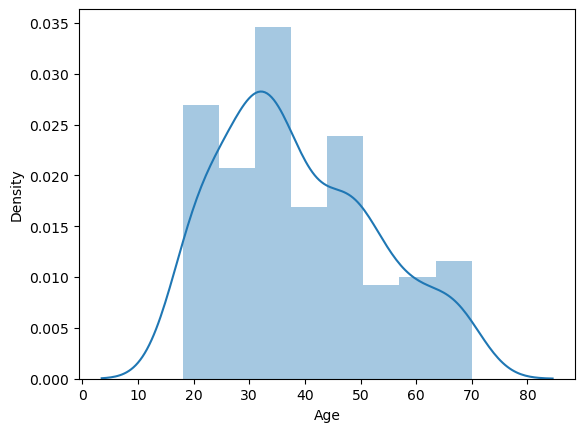

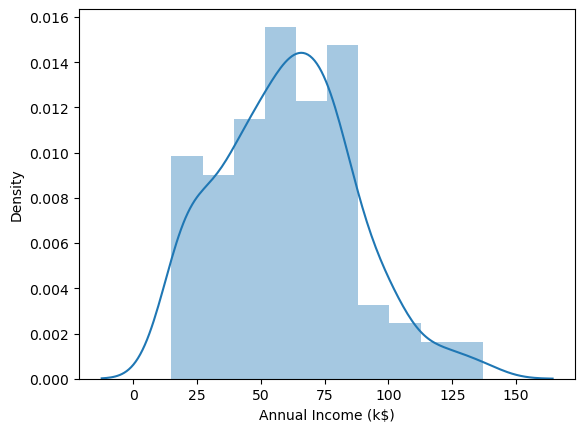

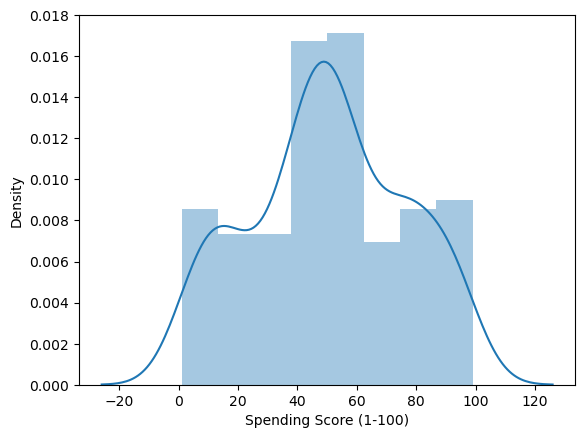

In [7]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

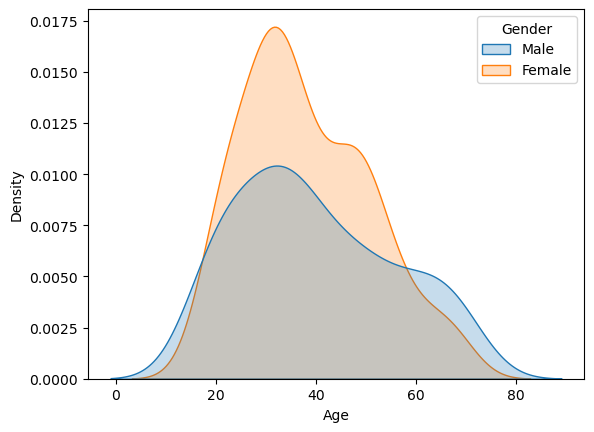

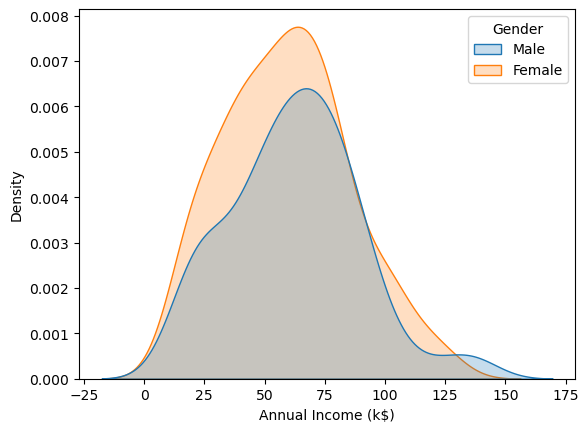

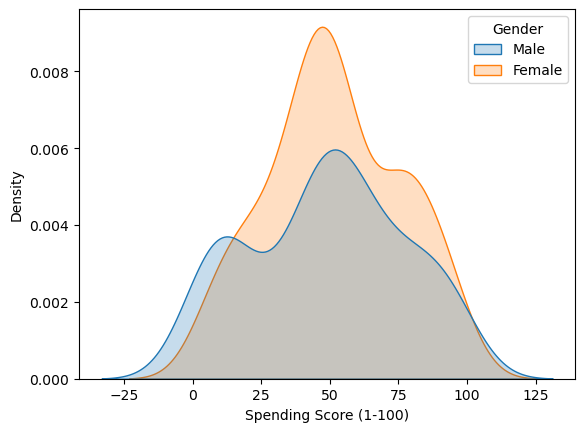

In [8]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(df[i],shade=True,hue=df['Gender'])

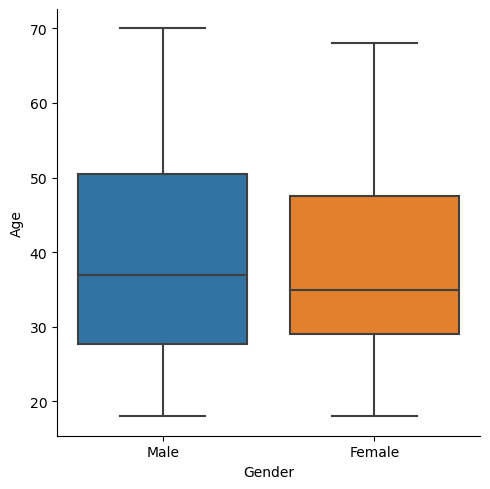

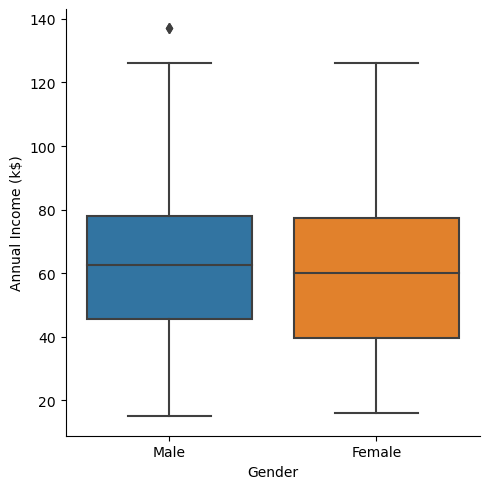

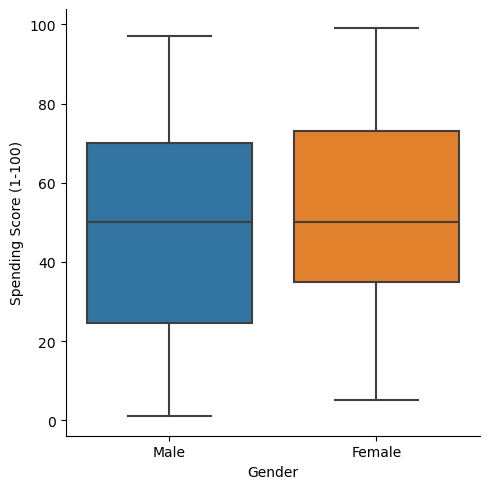

In [9]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
    sns.catplot(x='Gender',y=i,data=df,kind='box')
    plt.show()

In [10]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Bivariate Analysis

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

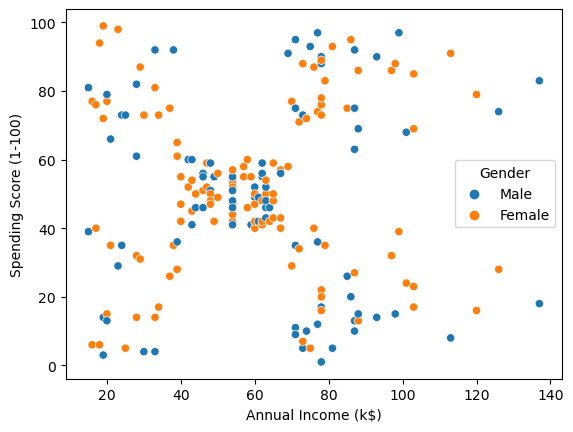

In [11]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df,hue='Gender')

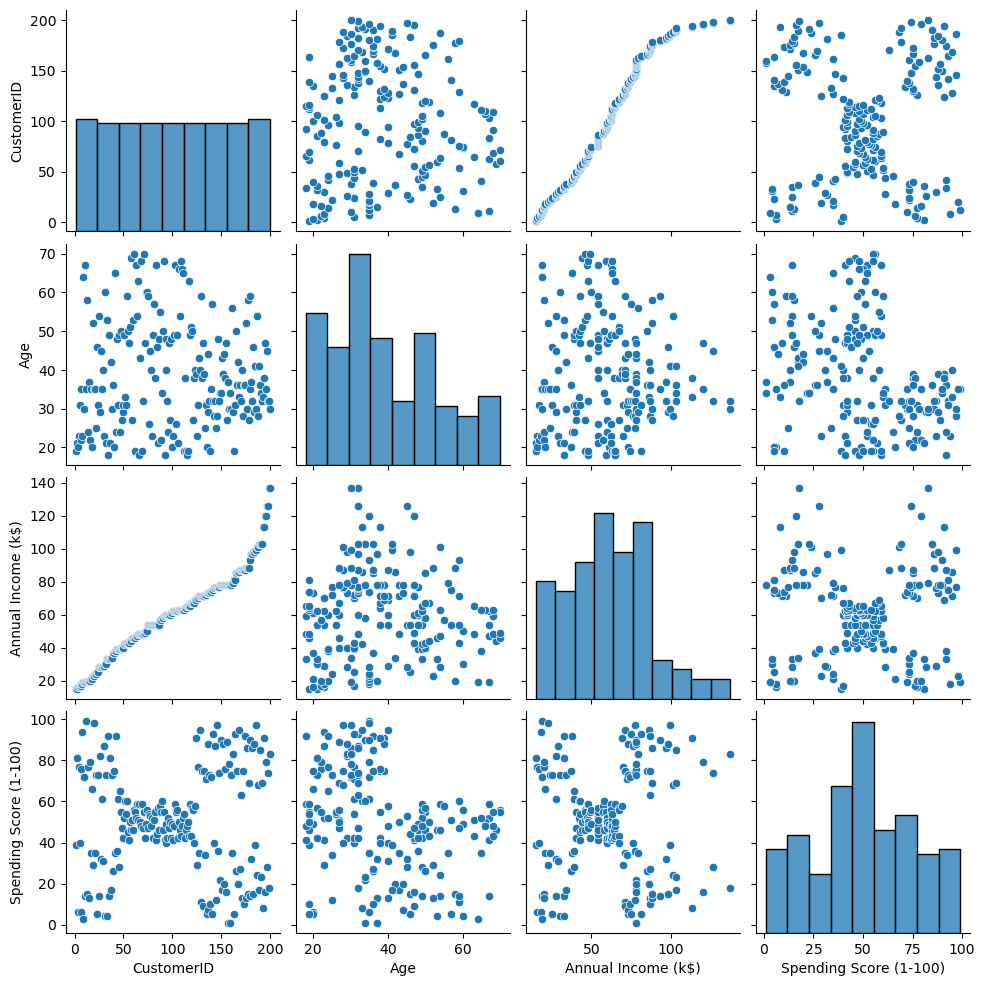

In [12]:
sns.pairplot(data=df)

### Dropping CustomerID

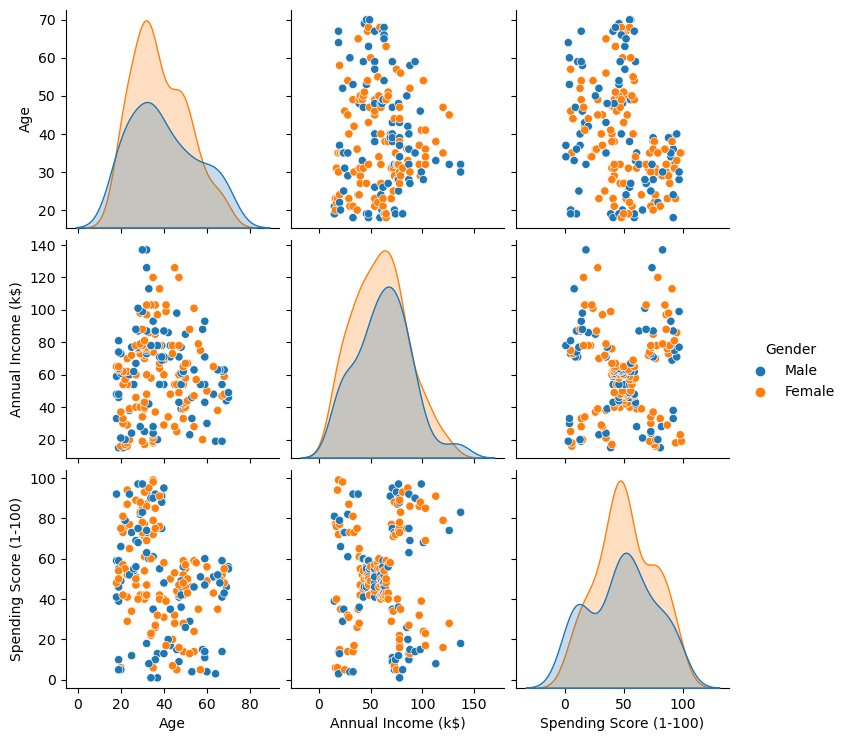

In [13]:
# Check if 'CustomerID' column exists in the DataFrame
if 'CustomerID' in df.columns:
    df = df.drop('CustomerID', axis=1)

# Create pairplot
sns.pairplot(data=df, hue='Gender')


In [14]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12104\4108468456.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Gender'])['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [15]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<AxesSubplot:>

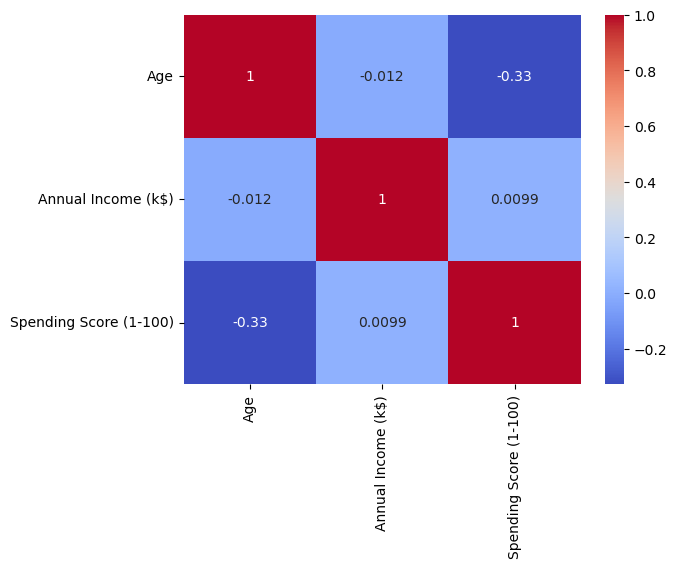

In [16]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')